Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Četvrta laboratorijska vježba: Procjena parametara, probabilistički grafički modeli, grupiranje

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **15. siječnja 2023. u 23:59h**

------------------------------

### Upute

Četvrta laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.7 MB/s eta 0:00:00


In [ ]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline

def plot_silhouette(n_clusters, X):
    # Kôd preuzet s http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.cm.get_cmap("Dark2")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Vrijednosti koeficijenta siluete")
    ax1.set_ylabel("Oznaka grupe")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("Dark2")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers # changed to black
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="black", alpha=1, s=100, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=80, edgecolor='k')

    ax2.set_xlabel(r"$x_1$")
    ax2.set_ylabel(r"$x_2$")

    plt.show()

Populating the interactive namespace from numpy and matplotlib


### 1. Procjena maksimalne izglednosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [ ]:
def L(mi, N, m):
    umnozak=1
    for i in range(m):
      umnozak=umnozak*mi
    for i in range(N-m):
      umnozak=umnozak*(1-mi)  
    return umnozak  

Funkcija L zove se funkcija izglednosti (engl. likelihood function). Ona parametrima θ pridjeljuje vjerojatnost da iz populacije s parametrima θ izvuˇcemo uzorak D:


#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

Text(0.5, 1.0, 'N=100')

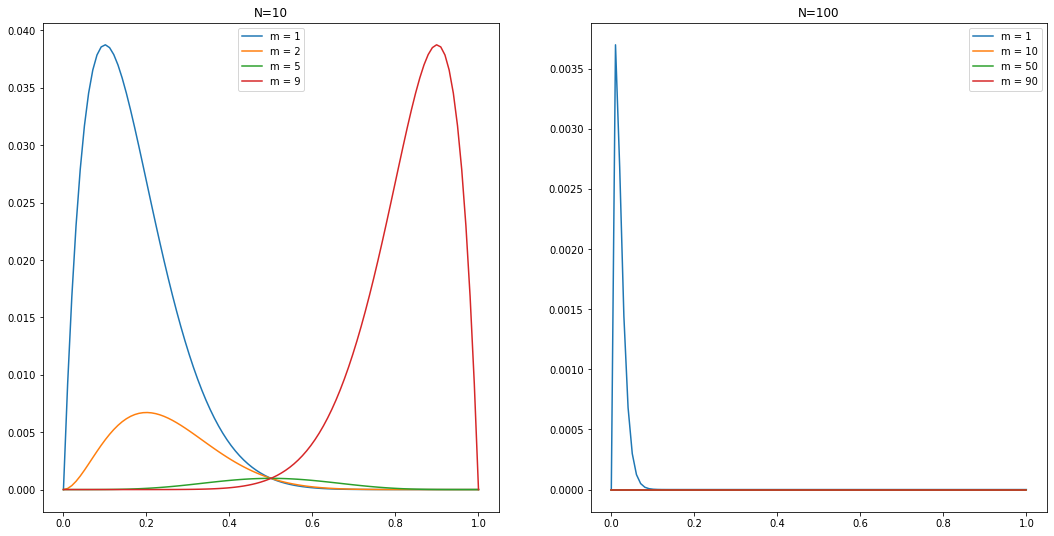

In [ ]:
mi = np.linspace(0,1, 100)
N=10
plt.figure(figsize=(18, 9))
plt.subplot(1, 2,1)
for m in [1,2,5,9]:
  
  izgl=[]
  for curr_mi in mi:
    izgl.append(L(curr_mi, N, m))

  plt.plot(mi, izgl)

plt.legend(['m = 1', 'm = 2', 'm = 5', 'm = 9'], loc = 'best');
plt.title("N=10")

N=100
plt.subplot(1, 2,2)
for m in [1,10,50,90]:
  
  izgl=[]
  for curr_mi in mi:
    izgl.append(L(curr_mi, N, m))

  plt.plot(mi, izgl)

plt.legend(['m = 1', 'm = 10', 'm = 50', 'm = 90'], loc = 'best');
plt.title("N=100")

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

Vrijednost je m/N. Zato što je najizglednija procjena (ML) upravo relativna frekvencija događaja u uzorku, odnosno srednja vrijednost uzorka.

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

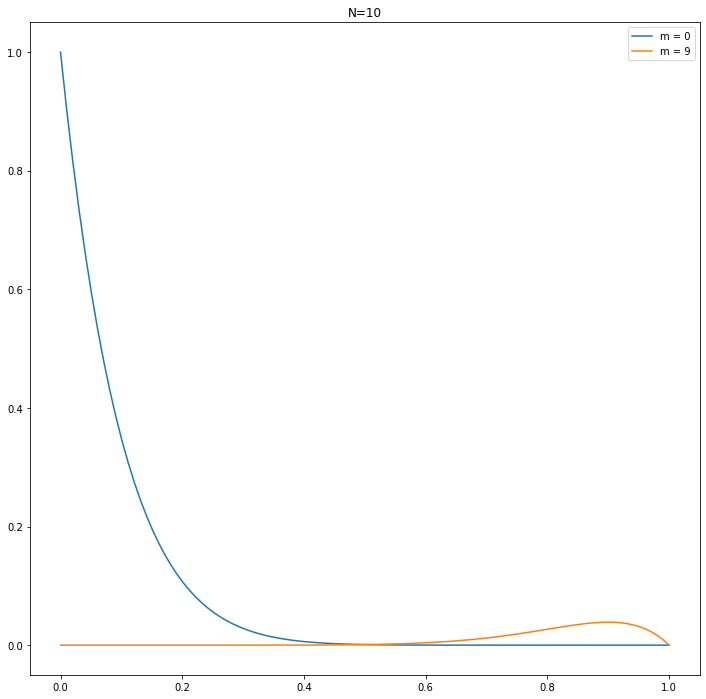

In [ ]:
mi = np.linspace(0,1, 100)
N=10
plt.figure(figsize=(12, 12))
for m in [0, 9]:
  
  izgl=[]
  for curr_mi in mi:
    izgl.append(L(curr_mi, N, m))

  plt.plot(mi, izgl)

plt.legend(['m = 0','m = 9'], loc = 'best');
plt.title("N=10")
plt.show()

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

Procjena je 0, problem je što je ML lako može dovesti do prenaučenosti modela i budući da imamo malo (samo 10) primjera, a svi su klase 0, to se i dogodilo.

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

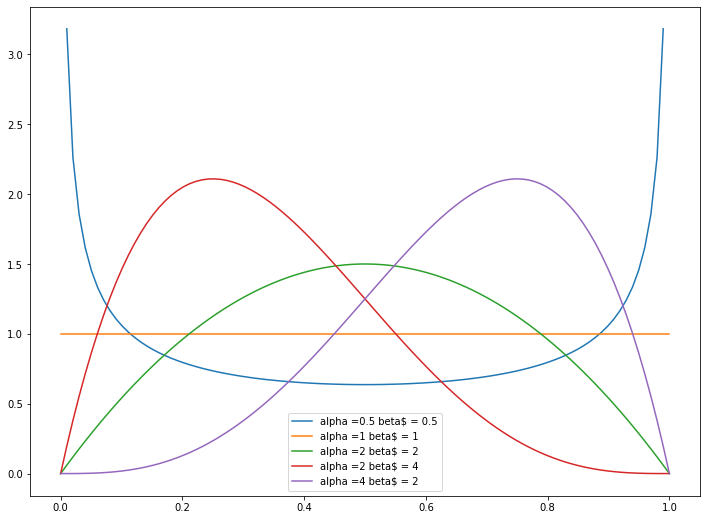

In [ ]:
from scipy.stats import beta
mi=np.linspace(0, 1, 100)
alphas = [0.5, 1, 2, 2, 4]
betas = [0.5, 1, 2, 4, 2]

plt.figure(figsize=(12, 9))
for a, b in zip(alphas, betas):
   plt.plot(mi, beta.pdf(mi, a, b), label = "alpha =" + str(a) + " beta$ = " + str(b))
plt.legend(loc = 'best')



**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

Npr. beta=2, alfa=4. Beta=2,alfa=2. Zato što je ona konjugatna apriorna distribucija za Bernoullijevu razdiobu; kombinacija Bernoullijeve i beta distribucije će opet biti beta distribucija, a maksimum beta distribucije je lako pronaći.

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

In [ ]:
# P(D|mi) = L(mi|D)

def P_mi_D(mi, N, m, a, b):
    return L(mi, N, m) * beta.pdf(mi, a, b)

<ipython-input-7-bf5bdf5fdb7c>:4: RuntimeWarning: invalid value encountered in multiply
  return L(mi, N, m) * beta.pdf(mi, a, b)


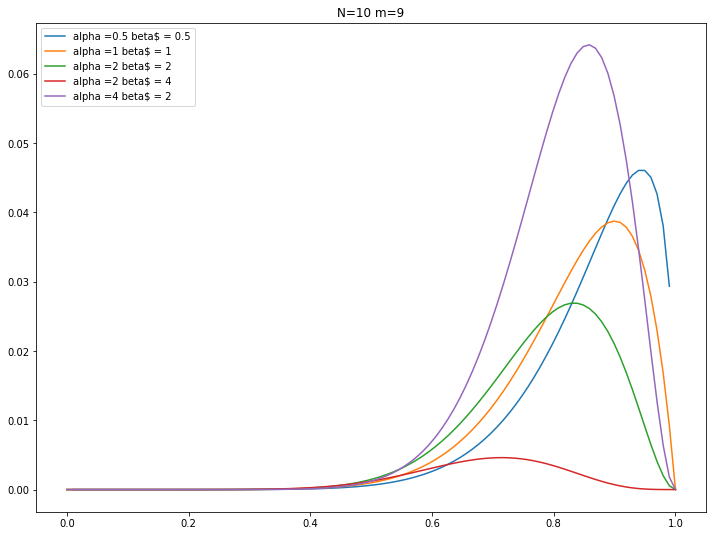

In [ ]:
mi=np.linspace(0, 1, 100)
alphas = [0.5, 1, 2, 2, 4]
betas = [0.5, 1, 2, 4, 2]
N=10
m=9

plt.figure(figsize=(12, 9))
for a, b in zip(alphas, betas):
   plt.plot(mi, P_mi_D(mi,N,m, a, b), label = "alpha =" + str(a) + " beta$ = " + str(b))

plt.title("N=10 m=9")
plt.legend(loc = 'best')

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

MAP procjena je pomaknuta od ML procjene prema očekivanoj, apriornoj (beta) distribuciji.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

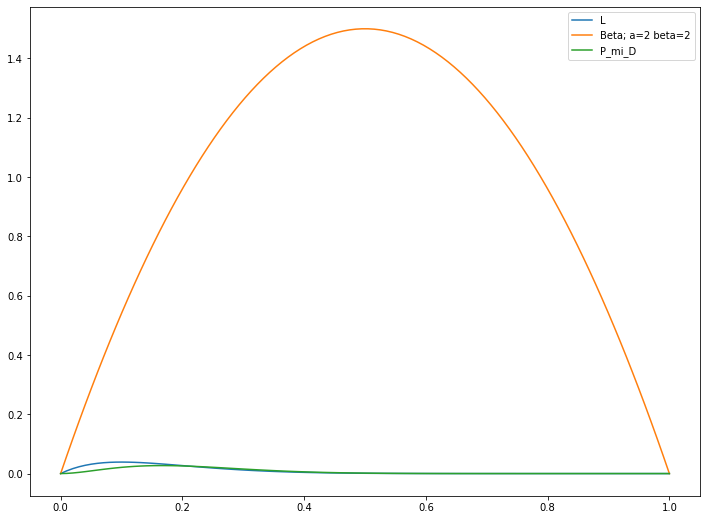

In [ ]:
N=10
m=1
a=2
b=2

plt.figure(figsize=(12, 9))
plt.plot(mi, L(mi, N, m), label = "L");
plt.plot(mi, beta.pdf(mi, a, b), label = "Beta; a="+str(a)+" beta="+str(b));
plt.plot(mi, P_mi_D(mi, N, m, a, b), label = "P_mi_D");
plt.legend(loc = 'best');

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

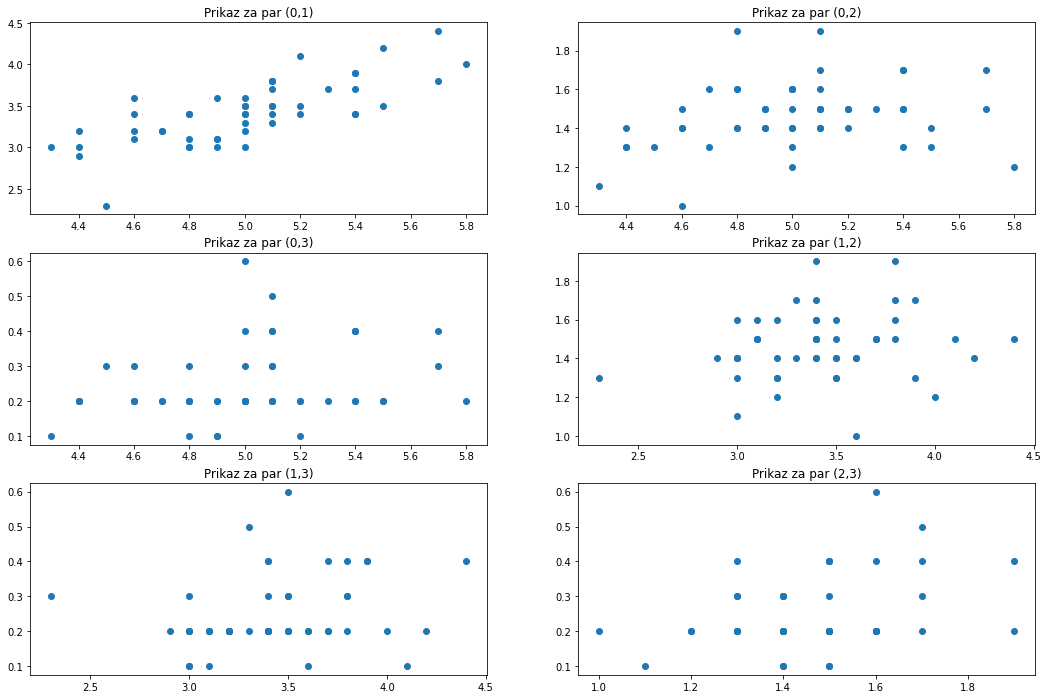

In [ ]:
from sklearn.datasets import load_iris
import itertools as it

iris = load_iris()
y =iris.target==0
X = iris.data[y]

x = it.combinations(range(0,4), 2)

plt.figure(figsize=(18, 12))


i= 1
for a,b in x:
    plt.subplot(3,2,i)
    plt.scatter(X[:,a], X[:,b])
    plt.title("Prikaz za par ("+ str(a)+","+str(b)+")")
    i += 1


#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [ ]:
from numpy.ma.core import log
from math import pi
from scipy.sparse.linalg.isolve.lsqr import sqrt
from scipy.stats import norm

def L_gauss(x, mi, sigma_kvad):
    N=len(x)
    razlomak_sum=0
    for i in x:
      razlomak_sum+=(i-mi)**2

    return -N/2*log(2*pi)-N*log(sqrt(sigma_kvad))-razlomak_sum/(2*sigma_kvad)

#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [ ]:
def ML_mi(x): 
  return sum(x)/len(x)

def ML_sigma_kvad(x): 
  razlomak_sum=0
  mi=ML_mi(x)
  for i in x:
    razlomak_sum+=(i-mi)**2
  return razlomak_sum/len(x)

In [ ]:
print("Za klasu 0")
for n in range(4):
    x = X[:,n]
    print("Za n="+str(n+1)+" mi="+str(ML_mi(x))+", sigma_kvad="+str(ML_sigma_kvad(x))+ ", log-izglednost="+str(L_gauss(x, ML_mi(x), ML_sigma_kvad(x))))

Za klasu 0
Za n=1 mi=5.006, sigma_kvad=0.12176400000000001, log-izglednost=-18.305163312803863
Za n=2 mi=3.428, sigma_kvad=0.14081600000000002, log-izglednost=-21.939396526466616
Za n=3 mi=1.4620000000000002, sigma_kvad=0.02955600000000001, log-izglednost=17.089786091159745
Za n=4 mi=0.24599999999999997, sigma_kvad=0.010884000000000007, log-izglednost=42.06460979129477


#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [ ]:
from scipy.stats import pearsonr
x = it.combinations(range(0,4), 2)

for a,b in x:
    print("Pearsonov koeficijent korelacije izmedju znacajke "+str(a)+" i znacajke "+ str(b)+" je: "+str(pearsonr(X[:,a], X[:,b])[0]))

Pearsonov koeficijent korelacije izmedju znacajke 0 i znacajke 1 je: 0.7425466856651596
Pearsonov koeficijent korelacije izmedju znacajke 0 i znacajke 2 je: 0.26717575886875716
Pearsonov koeficijent korelacije izmedju znacajke 0 i znacajke 3 je: 0.27809835293596963
Pearsonov koeficijent korelacije izmedju znacajke 1 i znacajke 2 je: 0.17769996678227068
Pearsonov koeficijent korelacije izmedju znacajke 1 i znacajke 3 je: 0.23275201136287935
Pearsonov koeficijent korelacije izmedju znacajke 2 i znacajke 3 je: 0.33163004080411873


#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [ ]:
y=iris.target==0
X=iris.data[y]

for br_primjera in [int(len(X)/4), int(len(X)/2), int(len(X))]:

    nepristrana = np.cov(X[0:br_primjera,:], rowvar = False, bias= False)
    pristrana = np.cov(X[0:br_primjera,:], rowvar = False, bias = True)
    
    abs = np.mean(np.abs(nepristrana - pristrana))
    kvad = np.mean((nepristrana - pristrana)**2)
    
    print("Uz "+ str(br_primjera)+ " primjera, srednja apsolutna razlika je "+str(abs)+", a srednja kvadratna razlika je "+str(kvad)) 

Uz 12 primjera, srednja apsolutna razlika je 0.0023989898989899023, a srednja kvadratna razlika je 1.293849160799922e-05
Uz 25 primjera, srednja apsolutna razlika je 0.0018493333333333304, a srednja kvadratna razlika je 7.680071499999981e-06
Uz 50 primjera, srednja apsolutna razlika je 0.000768923469387749, a srednja kvadratna razlika je 1.4518483236151334e-06


### 4. Probabilistički grafički modeli -- Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [`pgmpy`](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate. Upute se nalaze na gornjoj poveznici. Za korisnike Anaconde, najlakše je upisati `conda install -c ankurankan pgmpy` (ili `pip install pgmpy` ako ne prolazi) unutar Anaconda Prompta (i ponovno pokrenuti Jupyter).

Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (slučajna varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Ova mreža prikazana je na sljedećoj slici:

![This](http://www.fer.unizg.hr/_download/repository/bayes-net-sprinkler.jpg)

Koristeći paket `pgmpy`, konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim, koristeći **egzaktno** zaključivanje, postavite sljedeće posteriorne upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu. Pomoći će vam službena dokumentacija te primjeri korištenja (npr. [ovaj](https://github.com/pgmpy/pgmpy/blob/dev/examples/Monty%20Hall%20Problem.ipynb)).

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [ ]:
# Defining the network structure
model = BayesianModel([("C", "S"), ("C", "R"), ("S", "W"), ("R", "W")])

# Defining the CPDs:
cpd_c = TabularCPD("C", 2, [[0.5], [0.5]])
cpd_s = TabularCPD("S", 2, [[0.1,0.5], [0.9,0.5]], evidence=["C"], evidence_card=[2])
cpd_r = TabularCPD("R", 2, [[0.8, 0.2], [0.2, 0.8]], evidence=["C"], evidence_card=[2])
cpd_w =TabularCPD("W", 2, [[0.99,0.90,0.90,0.0], [0.01,0.10,0.10,1]], evidence=["S", "R"], evidence_card=[2,2])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)

infer = VariableElimination(model)
posterior_w = infer.query(["W"])
print(posterior_w)

posterior_s = infer.query(['S'], evidence={'W': 1})
print(posterior_s)

posterior_r = infer.query(['R'], evidence={'W': 1})
print(posterior_r)

posterior_c = infer.query(['C'], evidence={'S': 1, 'R': 1})
print(posterior_c)

posterior_c = infer.query(['C'])
print(posterior_c)

+------+----------+
| W    |   phi(W) |
+======+==========+
| W(0) |   0.6471 |
+------+----------+
| W(1) |   0.3529 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0621 |
+------+----------+
| S(1) |   0.9379 |
+------+----------+
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.1187 |
+------+----------+
| R(1) |   0.8813 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3103 |
+------+----------+
| C(1) |   0.6897 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+


/usr/local/lib/python3.8/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže?  

uvjetna nezavisnost među varijablama

**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi?  

Meni
dobijemo informacije iz nekih čvorova pomoću kojih zakljucujemo o drugim
čvorovima u oba smjera

**Q:** Koja je razlika između posteriornog upita i MAP-upita?  


Posteriorni upit racuna uvjetnu vjerojatnost,a MAP racuna najvjerojatniju vrijednost mape upita


**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?



jer dobivanje informacije o podredjenim cvorovima utjece na
roditelja

### 5. Efekt objašnjavanja

 **Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [ ]:
posterior_s = infer.query(['S'], evidence={'W':1, 'R':1})
print(posterior_s)

posterior_s = infer.query(['S'], evidence={'W':1, 'R':0})
print(posterior_s)

posterior_r = infer.query(['R'], evidence={'W':1, 'S':1})
print(posterior_r)

posterior_r = infer.query(['R'], evidence={'W':1, 'S':0})
print(posterior_r)

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0675 |
+------+----------+
| S(1) |   0.9325 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0215 |
+------+----------+
| S(1) |   0.9785 |
+------+----------+
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.1239 |
+------+----------+
| R(1) |   0.8761 |
+------+----------+
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.0411 |
+------+----------+
| R(1) |   0.9589 |
+------+----------+


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

Ako opazimo da su se ostvarili i y i z, to ´ce smanjiti vjerojatnost da se ostvario x u odnosu na
situaciju kada se ostvario samo z

### 6. Algoritam k-sredina

U ovom zadatku ćete se upoznati s algoritmom k-sredina (engl. *k-means*), njegovim glavnim nedostatcima te pretpostavkama.

#### (a)  
Jedan od nedostataka algoritma k-sredina jest taj što unaprijed zahtjeva broj grupa ($K$) u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koju ćete isprobati u ovom zadatku.

U svojim rješenjima koristite ugrađenu implementaciju algoritma k-sredina, dostupnoj u razredu [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

**NB**: Kriterijska funkcija algoritma k-sredina još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

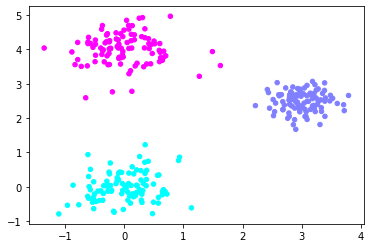

In [ ]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [3, 2.5], [0, 4]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

Iskoristite skup podataka `Xp` dan gore. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$. Metodom lakta/koljena odredite vrijednost hiperparametra $K$.

Text(0.5, 1.0, 'Ovisnost J o K')

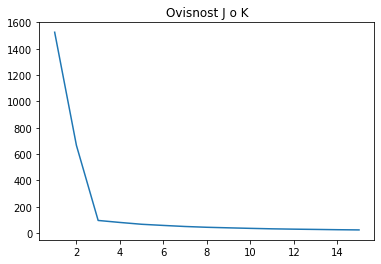

In [ ]:
from sklearn.cluster import KMeans

J=[]

for k in range(1, 16):
  kmeans = KMeans(n_clusters=k).fit(Xp)
  J.append(kmeans.inertia_)

plt.plot(range(1, 16), J)
plt.title("Ovisnost J o K")

**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? 

Vrijednost K=3, jer se na tom mjestu dogodio pregib (dogodila se
nagla promjena kriterijske funkcije algoritma k-srednjih
vrijednosti).

**Q**:Zašto? Je li taj odabir optimalan? Kako to znate?

jer na točkama poslije lakta smo pogodili prirodni broj grupa

**Q:** Je li ova metoda robusna?  

Ne nužno. Ako imamo dosta snažnih outliera, oni mogu znatno
povećati iznos kriterijske funkcije te će zahtijevati dodatne grupe 


**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

Ne možemo. Pogrešku J minimizirat će K koji je jednak broju
primjera, K=N, tj. tada će svaki primjer biti centroid za sebe i
pogreška J će biti J=0. Mi tražimo onaj K koji ima najbolju
sposobnost generalizacije, a preveliki K će, iako smanjuje kriterij
J, dovesti do prenaučenosti modela. 

#### (b)  
Odabir vrijednosti hiperparametra $K$ može se obaviti na mnoštvo načina. Pored metode lakta/koljena, moguće je isto ostvariti i analizom siluete (engl. *silhouette analysis*). Za to smo pripremili funkciju `plot_silhouette` koja za dani broj grupa i podatke iscrtava prosječnu vrijednost koeficijenta siluete i vrijednost koeficijenta svakog primjera (kroz grupe). 

Vaš je zadatak isprobati različite vrijednosti hiperparametra $K$, $K \in \{2, 3, 5\}$ i na temelju dobivenih grafova odlučiti se za optimalan $K$.

For n_clusters = 2 The average silhouette_score is : 0.59280796169837


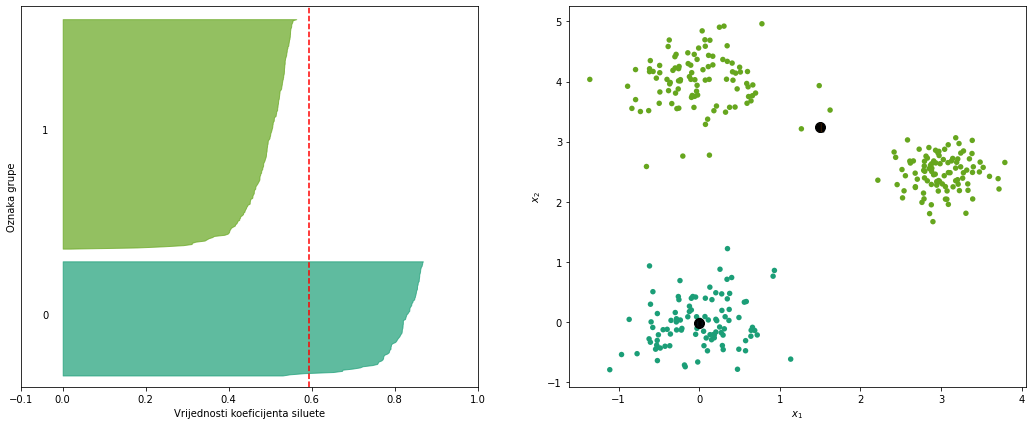

For n_clusters = 3 The average silhouette_score is : 0.7975462212061406


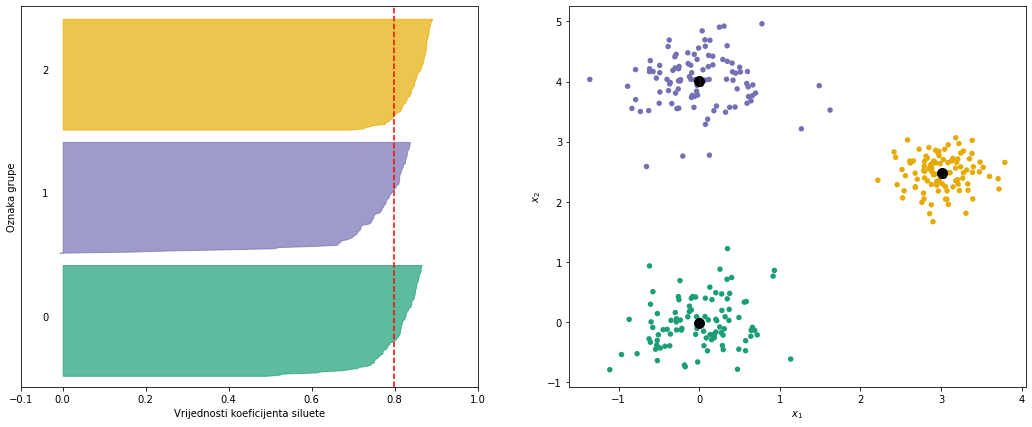

For n_clusters = 5 The average silhouette_score is : 0.5052371766008248


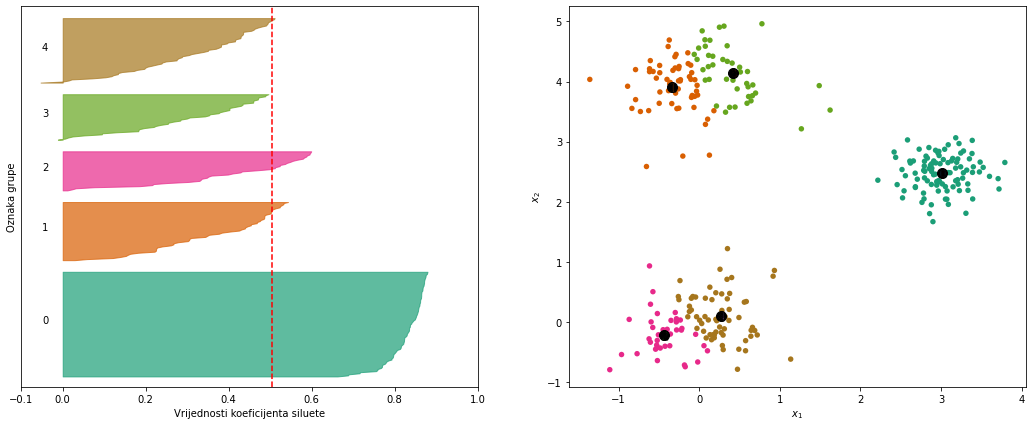

In [ ]:
i=1
for k in [2, 3, 5]:
  plot_silhouette(k, Xp)
  i+=1

**Q:** Kako biste se gledajući ove slike odlučili za $K$?  

3 zbog siluete

**Q:** Koji su problemi ovog pristupa?

Osjetljiv na buku

Radi samo za euklidsku udaljenost

Nekad ga je tesko interpretirati


Nije dobar kad se grupe preklapaju

Ne radi dobro za visoko dimenziske podatke

#### (c)  
U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-sredina te što se događa ako te pretpostavke nisu zadovoljene. 

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

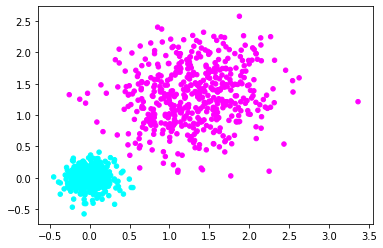

In [ ]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)

Naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

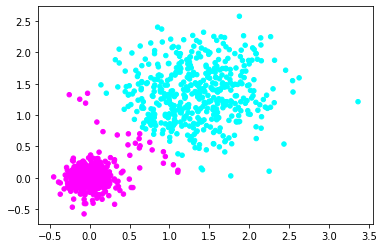

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X1)

plt.scatter(X1[:,0], X1[:,1], c=kmeans.predict(X1),cmap=plt.get_cmap("cool"), s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  

 Dio primjera jedne grupe bio je bliži centroidu druge grupe pa se
tako (krivo) grupirao. Narušena je pretpostavka da svaki primjer
pripada grupi čiji mu je centroid najbliži (jer jedna grupa ima
mnogo veću standardnu devijaciju od druge, neki od njenih primjera
će biti blizu centra druge grupe te se krivo grupirati).

**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

osigurati da su standardne devijacije dvaju
grupa jednake (što nema smisla kad u praksi ne znamo kako su
modelirani podaci - zato i radimo grupiranje) ili koristimo drugi
algoritam.

#### (d)

Isprobajte algoritam k-sredina na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

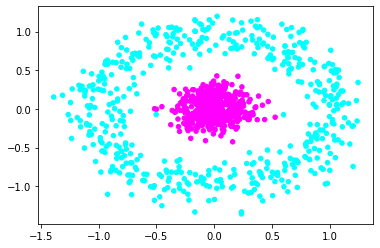

In [ ]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

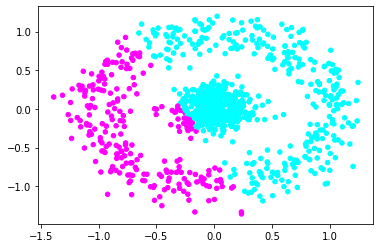

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X2)

plt.scatter(X2[:,0], X2[:,1], c=kmeans.predict(X2),cmap=plt.get_cmap("cool"), s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  

Kako su dva kruga jedan unutar drugog (linearno neodvojivi
podaci, u stvarnosti su centroidi obje grupe isti), algoritam ksrednjih vrijednosti ne može točno grupirati. Narušena je
pretpostavka da su centroidi dvaju grupa različiti.

**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

Osigurati da su centroidi dvaju grupa različiti (nemoguće za
ovakve, kružne podatke) ili promijeniti algoritam.


#### (e)  
Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

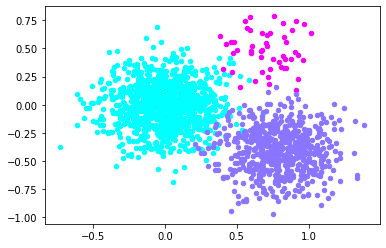

In [ ]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)

plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-sredina (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

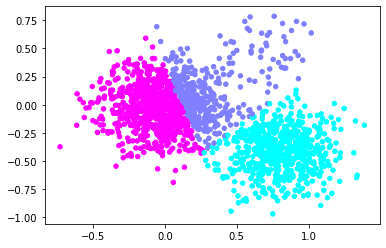

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X3)

plt.scatter(X3[:,0], X3[:,1], c=kmeans.predict(X3),cmap=plt.get_cmap("cool"), s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  

Plava  grupa ima jako puno podataka, a roza grupa malo podataka.
Centroid zelene grupe je određen i dosta je fiksan, teško ga je
pomaknuti - iako je neki podatak daleko od centra, on ne utječe puno
na sam centroid zbog mnogo podataka. S druge strane, centroid roze
grupe je lako pomaknuti jer imamo malo podataka. Neki dijelovi
plave grupe se u startu grupiraju pod rozu grupu, a to pomiče
centroid roze grupe bliže zelenoj te onda još više zelenih podataka
upada u rozu grupu i centroid roze grupe se još više približava
zelenoj te se to praktički rekurzivno ponavlja - roza grupa "izjeda"
zelenu te je na kraju dosta podataka krivo grupirano. Narušena je
pretpostavka da grupe imaju otprilike jednak broj članova.

**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

 Da grupe imaju podjednak broj članova ili koristiti drugi
algoritam.


### 7. Model Gaussovih mješavina

Sada kada ste se upoznali s ograničenjima algoritma k-sredina, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-sredina (odnosno, algoritam k-sredina specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (c)-(e). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

In [ ]:
from sklearn.mixture import GaussianMixture

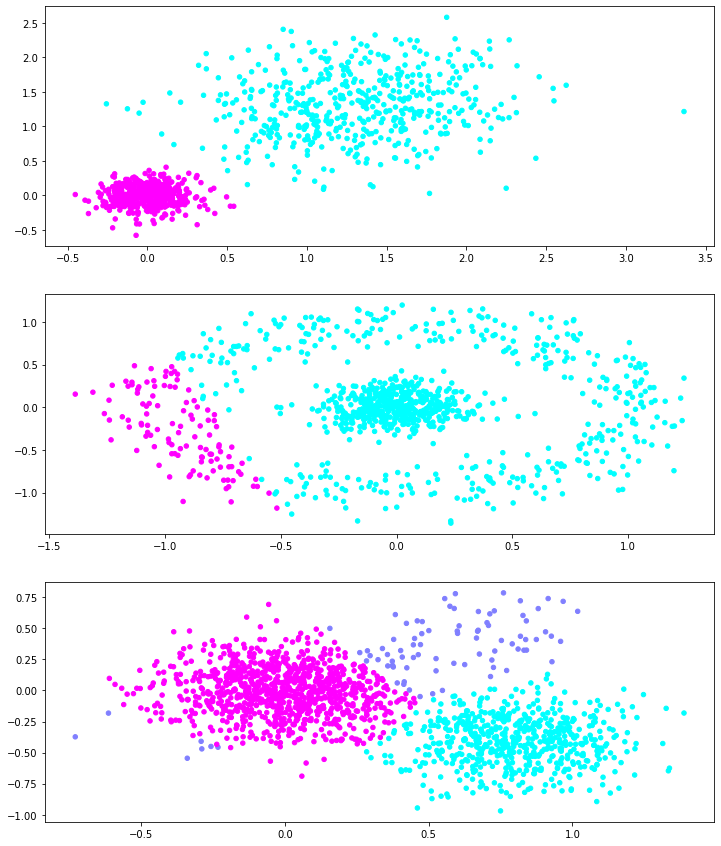

In [ ]:
#1
gauss = GaussianMixture(n_components = 2).fit(X1)

plt.figure(figsize=(12, 15))
plt.subplot(3,1,1)
plt.scatter(X1[:,0], X1[:,1], c=gauss.predict(X1), cmap=plt.get_cmap("cool"), s=20)

#2
gauss = GaussianMixture(n_components = 2).fit(X2)

plt.subplot(3,1,2)
plt.scatter(X2[:,0], X2[:,1], c=gauss.predict(X2), cmap=plt.get_cmap("cool"), s=20)

#3
gauss = GaussianMixture(n_components = 3).fit(X3)

plt.subplot(3,1,3)
plt.scatter(X3[:,0], X3[:,1], c=gauss.predict(X3), cmap=plt.get_cmap("cool"), s=20)

Q: Uspjeva li GMM riješiti "probleme" koje ima algoritam k-srednjih
vrijednosti? Zašto?

A: Prvi primjer da i to savršeno, jer su naši podaci u tom slučaju
modelirani Gaussovim distribucijama pa će GMM naći parametre koji
točno grupiraju. Drugi primjer ne, jer GMM isto kao i K-means
pretpostavlja da podaci imaju različite centre. Treći primjer
djelomično - kako GMM modelira Gaussove distribucije, on je rozu
grupu modelirao s točnim središtem, ali previsokom varijancom pa je
dio zelene grupe s lijeve strane krivo pripao rozoj grupi. 

### 8. Vrednovanje grupiranja

Kako vrednovati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`). Dobro će vam doći funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

In [ ]:
from matplotlib.projections.polar import OrderedDict
import itertools as it
from scipy.special import comb


def rand_index_score(y_gold, y_predict):

    #rasporedi u grupe
    N = len(y_gold)
    
    unikatne_klase=set(y_gold)
    unikatne_klase=list(unikatne_klase)

    unikatne_klase_predict=set(y_predict)
    unikatne_klase_predict=list(unikatne_klase_predict)

    #rasporedi ih u grupe
    groups={}
    
    for i in range(len(y_predict)):
        for klasa in unikatne_klase_predict:
          
          if y_predict[i] == klasa:
            if klasa in groups:
              tmp=groups[klasa]
              tmp.append(y_gold[i])
              groups[klasa]=tmp
              break
            else:
              groups[klasa]=[y_gold[i]]

    #sortiraj 
    groups = OrderedDict(sorted(groups.items()))

   
    groups_members={}
    for key in groups:
      nums={}

      for klasa in unikatne_klase_predict:
        nums[klasa]=0

      for clan in groups[key]:

        for klasa in unikatne_klase_predict:

          if clan == klasa:
            nums[klasa]=nums[klasa]+1
            break
  

      pom_list=[]
      
      for k in nums:
        pom_list.append(nums[k])
      
      groups_members[key]=pom_list
      

    #racunaj a
    a=0
    for key in groups_members:

      for num in groups_members[key]:
        a+=comb(num, 2)  
    
    #racunaj b
    parovi= it.combinations(unikatne_klase_predict, 2)
    b=0

    for i, j in parovi:
      
      nums1=np.asarray(groups_members[i])
      nums2=np.asarray(groups_members[j])
      
      for ind1 in range(len(nums1)):

        pom_sum=0
        for ind2 in range(len(nums2)):

          if ind1==ind2:
            continue

          pom_sum+=nums2[ind2]

        b+=nums1[ind1]*pom_sum

    return (a+b)/comb(N,2)   

In [ ]:
kmeans = KMeans(n_clusters=3).fit(Xp)

print("Randov indeks za kmeans(Xp, yp): "+ str(rand_index_score(yp, kmeans.predict(Xp))))   

Randov indeks za kmeans(Xp, yp): 1.0


**Q:** Zašto je Randov indeks pandan točnosti u klasifikacijskim problemima? 

Zato jer racuna tocnost samo na razini parova

**Q:** Koji su glavni problemi ove metrike?   

Glavni je problem to da očekivanje Randovog indexa dvaju random
grupiranja nema konstantnu vrijednost. To znači da u biti ne znamo
što je visok, a što nizak Randov index jer nemamo referentnu
vrijednost s kojom možemo usporediti. Npr. kod klasifikacije, ako
napravimo klasifikaciju 0-1 na random način, očekivana pogreška je
50% i sve manje od toga je dobro. Kod Randovog indeksa ne znamo
očekivanu pogrešku random grupiranja pa je teško samo na temelju
njega reći radi li naše grupiranje dobro.

**Q:** Kako vrednovati kvalitetu grupiranja ako nenamo stvarne oznake primjera? Je li to uopće moguće?

Medutim, kao ˇsto smo ve´c
napomenuli, u stvarnim primjenama grupiranja najˇceˇs´ce ipak ne znamo koji primjeri pripadaju
u koju grupu, pa onda Randov indeks raˇcunamo na manjem, ruˇcno oznaˇcenom uzorku primjera.
U praksi se umjesto Randovog indeksa ˇceˇs´ce koristi prilagoden Randov indeks (engl. adjusted
Rand index ), koji mjeru korigira s obzirom na oˇcekivanu sliˇcnost izmedu sluˇcajno grupiranih
parova primjera